In [1]:
import networkx as nx
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# create graph
g = nx.read_graphml("shriner.graphml")

In [3]:
# original graph info
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 153
Number of edges: 410
Average in degree:   2.6797
Average out degree:   2.6797


In [4]:
# Remove ego (Shriner) from g
g.remove_node('UCpV9w78mm-CfoE2IyjV3ZUw')

# Remove old Gephi measurements (which included ego in calculations)
listy = ['Component ID', 'Strongly-Connected ID', 'Weighted Out-Degree', 'size',
        'r', 'g', 'b', 'x', 'y', 'Weighted In-Degree', 'In-Degree', 'Out-Degree',
        'Eccentricity', 'Closeness Centrality', 'Harmonic Closeness Centrality',
        'Betweenness Centrality', 'Clustering Coefficient', 'Weighted Degree', 'Degree']

for node in g.nodes:
    for item in listy:
        del g.nodes[node][item]

In [5]:
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 152
Number of edges: 247
Average in degree:   1.6250
Average out degree:   1.6250


In [6]:
# Measurements for each node
deg = nx.degree(g)
eigeng = nx.eigenvector_centrality(g)
hg,ag = nx.hits(g)
cc = nx.closeness_centrality(g)
bc = nx.betweenness_centrality(g)
pr = nx.pagerank(g)
in_degree = g.in_degree()

In [7]:
# Series for each measure
deg_series = pd.Series(dict(deg))
in_degree_series = pd.Series(dict(in_degree))
cc_series = pd.Series(cc)
bc_series = pd.Series(bc)
clust = pd.Series(nx.clustering(g))
pr_series = pd.Series(dict(pr))

In [8]:
# print measurements for degree
print("The average degree for the ego network is {:.2f}".format(deg_series.mean()))
print(deg_series.max())
print(deg_series.min())

The average degree for the ego network is 3.25
25
0


C:\Users\moria\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\moria\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


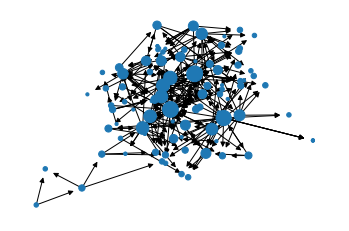

In [9]:
# graph by degree
pos  = nx.kamada_kawai_layout(g)
nx.draw_networkx_nodes(g,pos,node_size=deg_series*10)
nx.draw_networkx_edges(g,pos)
plt.axis('off')
plt.show()

In [8]:
# Create data table
networkdf = pd.DataFrame.from_dict(dict(g.nodes),orient="index")

In [9]:
# Add variables to networkdf
networkdf["Degree"] = deg_series
networkdf["in-degree"] = in_degree_series
networkdf['eigen'] = pd.Series(eigeng)
networkdf['hitsg_h'] = pd.Series(hg)
networkdf['hitsg_a'] = pd.Series(ag)
networkdf['Closeness Centrality'] = cc_series
networkdf['Betweenness Centrality'] = bc_series
networkdf['Page Rank'] = pr_series

In [10]:
# get strongly connected components
strong_count = 0
for c in nx.strongly_connected_components(g): strong_count += 1
print(strong_count)
# 135

weak_count = 0
for c in nx.weakly_connected_components(g): weak_count += 1
print(weak_count)
# 50

135
50


In [11]:
# Giant component?
Gc = max(nx.weakly_connected_component_subgraphs(g),key=len)
print(len(Gc))
# 101/152 = 66% > 50% --> it's a giant component

101


In [12]:
# within the Giant Component, what is the avg shortest path length/degree of separation?
nx.average_shortest_path_length(Gc)
# 0.404 -- pretty short (compared to 6)

0.4036633663366337

In [13]:
# Largest strongly connected component
largestStrong = g.subgraph(list(max(nx.strongly_connected_components(g), key=len)))
print(largestStrong.number_of_nodes())
g.number_of_nodes()
nx.diameter(largestStrong)

14


8

In [14]:
# record who is in the Giant Component/isolates
networkdf['in_Gc'] = [i in Gc.nodes for i in networkdf.index]
networkdf['is_isolate'] = [nx.is_isolate(g,i) for i in networkdf.index]

In [15]:
# Clustering
networkdf = networkdf.set_index(clust.index)
networkdf['Clustering'] = clust

In [16]:
nx.number_of_isolates(g)

47

In [17]:
print(nx.info(Gc))

Name: 
Type: DiGraph
Number of nodes: 101
Number of edges: 245
Average in degree:   2.4257
Average out degree:   2.4257


In [18]:
# Nodes which are not part of Giant Component and are not isolates
group = [i for i in networkdf.index if (networkdf['in_Gc'][i]==False and networkdf['is_isolate'][i]==False)]

# investigate ties between these
for i in group:
    print(i, networkdf['label'][i], list(g.neighbors(i)))

# Results: maybe not super interesting
# Katy Perry sends a tie to KatyPerryVEVO
# TheSportster sends a tie to TheTalko

UC-8Q-hLdECwQmaWNwXitYDw KatyPerryVEVO []
UCYvmuw-JtVrTZQ-7Y4kd63Q Katy Perry ['UC-8Q-hLdECwQmaWNwXitYDw']
UCY-4pT7awpmNacgbK56Odjg TheSportster ['UC1Ydgfp2x8oLYG66KZHXs1g']
UC1Ydgfp2x8oLYG66KZHXs1g TheTalko []


In [21]:
# Create Measurements for Giant Component
deg_gc = nx.degree(Gc)
deggc_series = pd.Series(dict(deg_gc))

cc_gc = nx.closeness_centrality(Gc)
bc_gc = nx.betweenness_centrality(Gc)
deg_gc = nx.degree(Gc)
clust_gc = nx.clustering(Gc)
hits_gc_h,hits_gc_a = nx.hits(Gc)
eigen_gc = nx.eigenvector_centrality(Gc)
in_degree_gc = Gc.in_degree()
clust_gc = pd.Series(nx.clustering(Gc))
pr_gc = nx.pagerank(Gc)

In [22]:
# Create dataframe for GC
gcdf = pd.DataFrame.from_dict(dict(Gc.nodes),orient="index")

In [23]:
# Add variables to gcdf
gcdf['in_degree'] = pd.Series(dict(in_degree_gc))
gcdf['closeness'] = pd.Series(cc_gc)
gcdf['betweeneess'] = pd.Series(bc_gc)
gcdf['degree'] = pd.Series(dict(deg_gc))
gcdf['clustering'] = pd.Series(clust_gc)
gcdf['hits_h']=pd.Series(hits_gc_h)
gcdf['hits_a'] = pd.Series(hits_gc_a)
gcdf['eigen'] = pd.Series(eigen_gc)
gcdf['Page Rank'] = pd.Series(dict(pr_gc))

In [24]:
# Clustering
gcdf = gcdf.set_index(clust_gc.index)
gcdf['Clustering'] = clust_gc

In [19]:
# Import channel attributes
import chardet    
rawdata = open('channel_categories.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']

file = pd.read_csv('channel_categories.csv',encoding=charenc)

In [20]:
categoriesdf = pd.DataFrame(file)


In [21]:
# Join dataframes
networkdf['id'] = networkdf.index
networkdf = pd.merge(networkdf, categoriesdf, on='id', how='left')

gcdf['id'] = gcdf.index
gcdf = pd.merge(gcdf, categoriesdf, on='id', how='left')

In [28]:
gcdf.category.unique()

array(['Reptile', 'Alternative Media', 'Christian fringe',
       'Enlightenment', 'Other', 'Entertainment', 'Christian',
       'Conservative'], dtype=object)

In [22]:
# Number nodes per  category
networkdf['category'].value_counts()

Alternative Media    55
Entertainment        30
Enlightenment        20
Other                14
Christian fringe     10
Conservative          9
Reptile               8
Christian             6
Name: category, dtype: int64

In [30]:
# Number nodes per category
gcdf['category'].value_counts()

Alternative Media    42
Enlightenment        16
Entertainment        11
Christian fringe      9
Reptile               8
Other                 7
Conservative          6
Christian             2
Name: category, dtype: int64

In [23]:
networkdf_avgs = networkdf.mean()
networkdf_avgs.to_csv('C:/Users/moria/OneDrive/Documents/OSN/sherryshriner/new/networkdf_avgs.csv')
# Measures by group: networkdf
categ_avgs = networkdf.groupby('category').mean()
categ_avgs.to_csv('C:/Users/moria/OneDrive/Documents/OSN/sherryshriner/new/category_avgs.csv')

C:\Users\moria\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [32]:
gcdf_avgs = gcdf.mean()
gcdf_avgs.to_csv('C:/Users/moria/OneDrive/Documents/OSN/sherryshriner/new/gcdf_avgs.csv')
gcdf_categ_avgs = gcdf.groupby('category').mean()
gcdf_categ_avgs.to_csv('C:/Users/moria/OneDrive/Documents/OSN/sherryshriner/new/gcdf_category_avgs.csv')

C:\Users\moria\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [24]:
display(networkdf)

,label,isseed,subscribercount,videocount,viewcount(100s),country,publishedat,daysactive,Degree,in-degree,...,Closeness Centrality,Betweenness Centrality,Page Rank,in_Gc,is_isolate,Clustering,id,title,category,description
0,The Watcher Files,no,1560,35,791,not set,2016-07-09T07:34:52.000Z,1335,4,1,...,0.008830,0.004062,0.006354,True,False,0.000000,UCWyMtUdib1FfXN_dwmUDXHw,The Watcher Files,Reptile,The Watcher Files - We're Watching
1,Skywatch Media News,no,142000,218,266306,US,2014-02-09T20:50:28.000Z,2216,1,0,...,0.000000,0.000000,0.004526,True,False,0.000000,UCuAiW236nsjQdcR2gwhgd0w,Skywatch Media News,Alternative Media,"A multimedia, independent news organization re..."
2,Top Stories Today,no,255000,1291,51895,US,2017-01-04T15:32:15.000Z,1156,0,0,...,0.000000,0.000000,0.004526,False,True,0.000000,UCSX7o6Dk3U_MGyEMhWRXl7w,Top Stories Today,Alternative Media,"Welcome to Top Stories Today (TST), This is yo..."
3,inaba12,no,36500,26,523241,not set,2006-02-14T23:48:45.000Z,5132,0,0,...,0.000000,0.000000,0.004526,False,True,0.000000,UC-imBRLfFuhdjRaxgMv4f_Q,inaba12,Christian,"well, today I recently saw that people could p..."
4,XtremeRealityCheck,no,106000,334,171629,US,2008-09-13T22:40:59.000Z,4191,9,3,...,0.061525,0.002079,0.006090,True,False,0.138889,UCNqkB9BhN0cVXlanwIsNL8w,XtremeRealityCheck,Alternative Media,The Paradigm Shift... break free of the mainst...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,shanells spirits,no,525,2,11,not set,2015-02-14T21:15:08.000Z,1846,0,0,...,0.000000,0.000000,0.004526,False,True,0.000000,UCeii40cSy6WCfamvmzZmZ1w,shanells spirits,Christian fringe,NaN
148,Chuki Beats,no,600000,727,1001192,BE,2013-05-30T18:59:39.000Z,2471,0,0,...,0.000000,0.000000,0.004526,False,True,0.000000,UCSyBSyLk4ZvXd2Fj-tLojag,Chuki Beats,Entertainment,Chuki Beats is a Belgian Hip Hop producer with...
149,Gray Hughes Investigates,no,41700,1032,129378,not set,2006-06-13T21:23:07.000Z,5014,6,2,...,0.013245,0.000309,0.006258,True,False,0.033333,UCn896xjjlOv5Uvk02FVHUKw,Gray Hughes Investigates,Alternative Media,Crime scene reconstruction and analysis
150,MrMBB333,no,390000,2819,1311060,US,2008-11-24T17:56:51.000Z,4119,3,3,...,0.053295,0.000000,0.007764,True,False,0.000000,UCaVp-iXRPfiSxbkhmi56IHQ,MrMBB333,Alternative Media,"We are living in very unique, changing times a..."


In [34]:
# join attribute data to graphml
for i in g.nodes():  
    for j in networkdf.index:
      if networkdf['id'][j] == i:
        g.node[i]['category'] = networkdf['category'][j]
        g.node[i]['in_Gc'] = networkdf['in_Gc'][j]
        g.node[i]['is_isolate'] = networkdf['is_isolate'][j]
        g.node[i]['Degree'] = networkdf['Degree'][j]
        g.node[i]['Closeness Centrality'] = networkdf['Closeness Centrality'][j]
        g.node[i]['Betweenness Centrality'] = networkdf['Betweenness Centrality'][j]
        g.node[i]['Eigenvector Centrality whole'] = networkdf['eigen'][j]
        g.node[i]['hits_h g'] = networkdf['hitsg_h'][j]
        g.node[i]['hits_a g'] = networkdf['hitsg_a'][j]
        g.node[i]['Clustering Whole'] = networkdf['Clustering'][j]
    

In [35]:
# export gcdf to csv
gcdf.to_csv('C:/Users/moria/OneDrive/Documents/OSN/sherryshriner/new/gcdf.csv')

In [25]:
# export networkdf csv
networkdf.to_csv('C:/Users/moria/OneDrive/Documents/OSN/sherryshriner/new/networkdf.csv')